In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
SB_WIDTH = 2 # Change this to generate different plots

In [44]:
sr_center = 3500
sr_width = 200

sr_left = sr_center - sr_width
sr_right = sr_center + sr_width

sb_left = sr_left - sr_width * SB_WIDTH
sb_right = sr_right + sr_width * SB_WIDTH

In [45]:
np_bg_SB = np.load("../data/processed/np_bg_SB_" + str(SB_WIDTH) + ".npy")
np_sig_SB = np.load("../data/processed/np_sig_SB_" + str(SB_WIDTH) + ".npy")
np_bg_SR = np.load("../data/processed/np_bg_SR_" + str(SB_WIDTH) + ".npy")
np_sig_SR = np.load("../data/processed/np_sig_SR_" + str(SB_WIDTH) + ".npy")

In [46]:
np_bg = np.concatenate((np_bg_SB, np_bg_SR), axis = 0)
np_sig = np.concatenate((np_sig_SB, np_sig_SR), axis = 0)

In [50]:
print("Total: {} events: {} bg, {} sig, {:.4f} S/B".format(np_bg.shape[0] + np_sig.shape[0], np_bg.shape[0], np_sig.shape[0], np_sig.shape[0]/np_bg.shape[0]))
print("SB: {} events: {} bg, {} sig, {:.4f} S/B".format(np_bg_SB.shape[0] + np_sig_SB.shape[0], np_bg_SB.shape[0], np_sig_SB.shape[0], np_sig_SB.shape[0]/np_bg_SB.shape[0]))
print("SR: {} events: {} bg, {} sig, {:.4f} S/B".format(np_bg_SR.shape[0] + np_sig_SR.shape[0], np_bg_SR.shape[0], np_sig_SR.shape[0], np_sig_SR.shape[0]/np_bg_SR.shape[0]))

Total: 991602 events: 800192 bg, 191410 sig, 0.2392 S/B
SB: 598330 events: 557516 bg, 40814 sig, 0.0732 S/B
SR: 393272 events: 242676 bg, 150596 sig, 0.6206 S/B


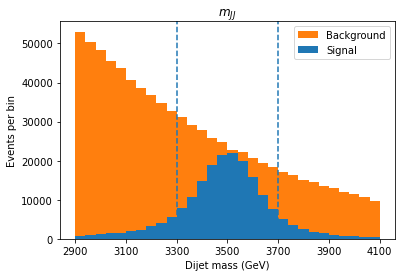

In [47]:
plt.title("$m_{JJ}}$")
plt.hist(np_bg[:,-1], range = (sb_left, sb_right), bins = (SB_WIDTH + 1) * 10, color = "tab:orange", label = "Background")
plt.hist(np_sig[:,-1], range = (sb_left, sb_right), bins = (SB_WIDTH + 1) * 10, color = "tab:blue", label = "Signal")
plt.ylabel("Events per bin")
plt.xlabel("Dijet mass (GeV)")
plt.xticks(np.linspace(sb_left, sb_right, int((sb_right - sb_left) / sr_width) + 1))
plt.axvline(sr_center - sr_width, ls = '--')
plt.axvline(sr_center + sr_width, ls = '--')
plt.legend()
plt.show()